In [47]:
# USE 'BASE' ENVIRONMENT

import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
taus = [0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2]

In [18]:
def get_stats(taus, batch_index):
    stat_dfs = []
    for tau in taus:
        tau_str = str(tau).replace(".", "_")
        # input_path = r"../scores/taus/" + f'tau_{tau_str}/scores_{tau_str}{batch_str}.csv'
        input_path = r"../scores/taus/" + f'tau_{tau_str}/scores_11_stocks_{tau_str}_iter_{batch_index}.csv'
        df = pd.read_csv(input_path, index_col = 0)
        df = df.iloc[:-1]                               # LAST ROW HAS BROKEN VALUES
        stats = pd.DataFrame()
        means = []
        stds = []
        percentiles_5 = []
        percentiles_95 = []
        for col in df.columns:
            means.append(df[col].mean())
            stds.append(df[col].std())
            percentiles_5.append(np.percentile(df[col], 5))
            percentiles_95.append(np.percentile(df[col], 95))
        stats[f"Models"] = df.columns.to_list()
        stats["MEAN"] = means
        stats[f"STD"] = stds
        stats[f"5th PERCENTIL"] = percentiles_5
        stats[f"95th PERCENTIL"] = percentiles_95
        stats.sort_values(by="MEAN", inplace=True)
        stat_dfs.append(stats)
    return stat_dfs

In [19]:
stats_1 = get_stats(taus, 1)
tau_index = 3
stats_1[tau_index][stats_1[tau_index]["Models"].str.contains("val")]

,Models,MEAN,STD,5th PERCENTIL,95th PERCENTIL
0,clayton_random+gauss_dist+val,-0.003678,0.002393,-0.006312,-0.000495
2,clayton_random+t_dist+val,-0.003277,0.002078,-0.005676,-0.000497
8,t_student+gauss_dist+val,-0.001814,0.000979,-0.003228,-0.000497
4,gaussian+gauss_dist+val,-0.001641,0.000938,-0.002944,-0.000495
10,t_student+t_dist+val,-0.001620,0.000827,-0.002818,-0.000499
6,gaussian+t_dist+val,-0.001423,0.000760,-0.002484,-0.000496


In [34]:

def get_taus_scores(taus):
    scores = {}
    for iter in range(1, 11):
        tau_dfs = {}
        for tau in taus:
            tau_str = str(tau).replace(".", "_")
            input_path = r"../scores/taus/" + f'tau_{tau_str}/scores_11_stocks_{tau_str}_iter_{iter}.csv'
            df = pd.read_csv(input_path, index_col = 0)
            df = df.iloc[:63]
            tau_dfs[tau] = df
        scores[iter] = tau_dfs
    return scores


def get_test_results(data, lower_bound, upper_bound, p_value_threshold):
    val_columns = [col for col in data.columns if "val" in col]

    results = []
    for col in val_columns:
        in_range_count = ((data[col] >= lower_bound) & (data[col] <= upper_bound)).sum()
        total_count = len(data[col])
        observed_proportion = in_range_count / total_count
        expected_proportion = 1.0
        stat, p_value = proportions_ztest(in_range_count, total_count, value=expected_proportion)
        results.append({
            "Column": col,
            "Observed Proportion": observed_proportion,
            "P-Value": p_value,
            "Reject H0": p_value < p_value_threshold
        })
    results_df = pd.DataFrame(results)
    return results_df

In [44]:
scores = get_taus_scores(taus)
portfolio_idx = 5
data = scores[portfolio_idx][0.005]
data

,clayton_random+gauss_dist+val,clayton_random+gauss_dist+score,clayton_random+t_dist+val,clayton_random+t_dist+scor,gaussian+gauss_dist+val,gaussian+gauss_dist+score,gaussian+t_dist+val,gaussian+t_dist+scor,t_student+gauss_dist+val,t_student+gauss_dist+score,t_student+t_dist+val,t_student+t_dist+scor
0,-0.010137,0.000038,-0.009441,0.000036,-0.004634,0.000029,-0.004372,0.000028,-0.004567,0.000028,-0.004258,0.000027
1,-0.009035,0.000024,-0.008038,0.000023,-0.006167,0.000020,-0.005349,0.000019,-0.005921,0.000019,-0.005142,0.000018
2,-0.006504,0.000024,-0.005546,0.000022,-0.003928,0.000020,-0.003174,0.000019,-0.003969,0.000020,-0.003262,0.000019
3,-0.006935,0.000023,-0.005904,0.000022,-0.004117,0.000019,-0.003305,0.000018,-0.004217,0.000020,-0.003430,0.000019
4,-0.006669,0.000020,-0.005913,0.000020,-0.003763,0.000016,-0.003155,0.000016,-0.004004,0.000016,-0.003398,0.000016
...,...,...,...,...,...,...,...,...,...,...,...,...
58,-0.000456,0.000043,-0.000513,0.000055,-0.000442,0.000043,-0.000507,0.000055,-0.000445,0.000043,-0.000507,0.000054
59,-0.000453,0.000042,-0.000499,0.000052,-0.000432,0.000042,-0.000490,0.000052,-0.000438,0.000042,-0.000494,0.000052
60,-0.000487,0.000052,-0.000487,0.000052,-0.000487,0.000051,-0.000487,0.000051,-0.000487,0.000051,-0.000487,0.000051
61,-0.000438,0.000042,-0.000438,0.000042,-0.000441,0.000043,-0.000441,0.000043,-0.000440,0.000042,-0.000440,0.000042


In [45]:
a, b = -0.005, 0
p_value_threshold = 0.05
results = get_test_results(data, a, b, p_value_threshold)
results

,Column,Observed Proportion,P-Value,Reject H0
0,clayton_random+gauss_dist+val,0.920635,0.019782,True
1,clayton_random+t_dist+val,0.920635,0.019782,True
2,gaussian+gauss_dist+val,0.984127,0.313439,False
3,gaussian+t_dist+val,0.984127,0.313439,False
4,t_student+gauss_dist+val,0.984127,0.313439,False
5,t_student+t_dist+val,0.984127,0.313439,False


In [42]:
def plot_models_for_tau(portfolio_scores, tau):
    tau_scores = portfolio_scores[tau]
    val_columns = [col for col in tau_scores.columns if "val" in col]
    for val_col in val_columns:
        plt.plot(tau_scores[val_col])
    plt.show()



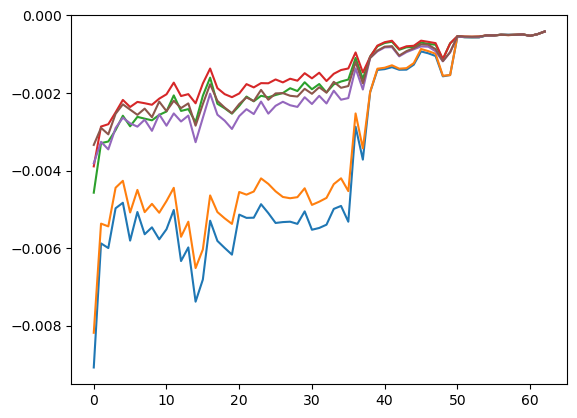

In [43]:
tau = 0.005
plot_models_for_tau(scores[1], tau)

In [49]:
a, b = -0.005, 0
p_value_threshold = 0.05

for iter in range(1, 11):
    for tau in taus:
        tau_score = scores[iter][tau]
        results = get_test_results(tau_score, a, b, p_value_threshold)
        print(f"Portfolio Iter: {iter}, Tau: {tau}\n")
        print(results)
        print("\n")

Portfolio Iter: 1, Tau: 0.0005

                          Column  Observed Proportion   P-Value  Reject H0
0  clayton_random+gauss_dist+val             0.873016  0.002469       True
1      clayton_random+t_dist+val             0.936508  0.038764       True
2        gaussian+gauss_dist+val             1.000000       NaN      False
3            gaussian+t_dist+val             1.000000       NaN      False
4       t_student+gauss_dist+val             1.000000       NaN      False
5           t_student+t_dist+val             1.000000       NaN      False


Portfolio Iter: 1, Tau: 0.001

                          Column  Observed Proportion   P-Value  Reject H0
0  clayton_random+gauss_dist+val             0.857143  0.001194       True
1      clayton_random+t_dist+val             0.936508  0.038764       True
2        gaussian+gauss_dist+val             1.000000       NaN      False
3            gaussian+t_dist+val             1.000000       NaN      False
4       t_student+gauss_dist+val   